## 퍼셉트론
#### 퍼셉트론으로 AND, OR, NAND, XOR 게이트 만들기

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [3]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

w*x

array([0. , 0.5])

In [4]:
np.sum(w*x) + b

-0.19999999999999996

In [5]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [6]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.3
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [8]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


In [9]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


## 각종 활성화 함수들 모음(Activation function)

In [10]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

넘파이 적용 가능하게 바꾼 step function

In [11]:
def step_function(x):
    y = x > 0
    return y.astype(int)

In [12]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [13]:
y = x > 0
y

array([False,  True,  True])

In [14]:
y = y.astype(int)
y

array([0, 1, 1])

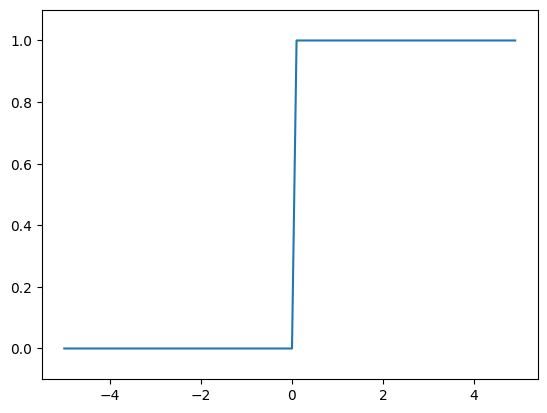

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### sigmoid 함수 구현

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

이게 가능한 이유는 넘파이의 브로드캐스팅 기능 덕분! 브로드캐스팅은 서로 다른 모양의 배열도 연산이 가능하게 함

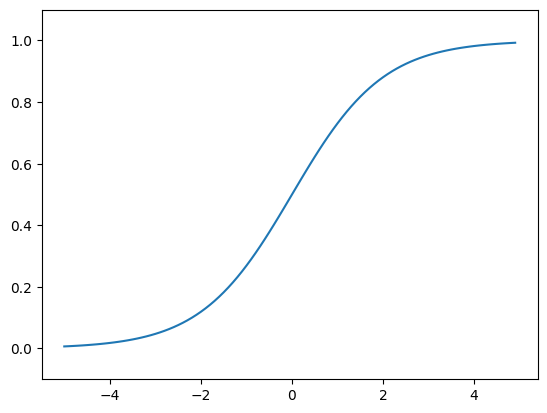

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

ReLU 함수

In [19]:
def relu(x):
    return np.maximum(0, x)

## 다차원 배열의 계산 
넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있다.
그래서 이번 절에서는 넘파이의 다차원 배열 계산에 대해서 설명한 뒤 신경망을 구현해보자!

In [20]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [21]:
np.ndim(A)

1

In [22]:
A.shape

(4,)

In [23]:
A.shape[0]

4

In [24]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [25]:
np.ndim(B)

2

In [26]:
B.shape

(3, 2)

## 행렬의 곱
선형대수학에서 배운 것처럼 행렬의 곱을 하면 된다!

In [27]:
A = np.array([[1, 2],[3, 4]])
A.shape

(2, 2)

In [28]:
B = np.array([[5, 6],[7, 8]])
B.shape

(2, 2)

In [29]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [30]:
A = np.array([[1, 2, 3],[4, 5, 6]])
A.shape

(2, 3)

In [31]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [32]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [33]:
C = np.array([[1, 2], [3, 4]])
C.shape
A.shape
np.dot(A, C) # 이렇게하면 오류 발생! 대응하는 차원의 원소 수를 일치시켜야 함!

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([7, 8])
np.dot(A, B)

array([23, 53, 83])

## 이제 신경망에서의 행렬 곱을 구해보자!

In [34]:
X = np.array([1, 2])
X.shape

(2,)

In [35]:
W = np.array([[1, 3, 5],[2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [36]:
W.shape

(2, 3)

In [37]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3층 신경망 구현하기
넘파이 배열을 잘만 사용하면 아주 적은 코드로 신경망의 순방향 처리 즉, Forward Propagation을 구현할 수 있다. 

In [38]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [39]:
A1 = np.dot(X, W1) + B1
print(A1)
# 이 결과를 활성화 함수에 입력해야함
Z1 = sigmoid(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [40]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [41]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [42]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

## 구현 정리
위 내용을 합쳐 하나의 내용으로 정리하면 아래와 같다

In [43]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([[0.1, 0.2, 0.3]])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[[0.31682708 0.69627909]]


In [44]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [45]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [46]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [47]:
def softmax(x):
    exp_a = np.exp(x)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

그러나 softmax 함수 사용시 위에 코드처럼 그냥 사용하면 지수함수이기에 오버플로우가 발생하여 결과 수치가 불안정해진다. 고로 아래와 샅이 바꿔야 함

In [48]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\dhson\AppData\Local\Temp\ipykernel_42804\832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\dhson\AppData\Local\Temp\ipykernel_42804\832863605.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [49]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [50]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [51]:
def softmax(x):
    c = np.max(x)
    exp_a = np.exp(x - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [52]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [53]:
np.sum(y)

1.0

In [54]:
import sys, os
sys.path.append(os.path.join(os.path.dirname('./dataset/mnist.py'), '..'))
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [55]:
import os, sys
sys.path.append(os.path.join(os.path.dirname('./dataset/mnist.py'), '..'))
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [56]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    
    return x_test, t_test

def init_network():
    with open('./dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [57]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print('Accuracy:'+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [58]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [59]:
x.shape

(10000, 784)

In [60]:
x[0].shape

(784,)

In [61]:
W1.shape

(784, 50)

In [62]:
W2.shape

(50, 100)

In [63]:
W3.shape

(100, 10)

이때 X의 shape를 100 X 784로 만든다면 100장 분량의 입력 데이터의 결과가 한 번에 출력됨을 뜻한다.  
고로 이때 출력 Y의 shape도 100X10이 되며 x[1]과 y[1]에는 1번째의 이미지와 그 결과가 저장되는 식이다.  
이처럼 하나로 묶은 입력 데이터를 배치(batch)라고 부른다. 이미지가 지폐처럼 다발로 묶여있는 형식임. 

#### 왜 배치 처리를 하는가?
- 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있음
- 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 이때 배치 처리를 통해 버스에 주는 부하를 줄일 수 있음  
  
고로 배치 처리 시에 수행되는 큰 배열로 이루어진 계산이 작은 배열을 여러 번 계산하는 것보다 컴퓨터에서 빠르기 때문이다.

In [64]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print('Accuracy:' + str(float(accuracy_cnt)/ len(x)))

Accuracy:0.9352


In [65]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [66]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3

## 신경망 학습
신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다. 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 결정한다.  
덕분에 모든 가중치를 수작업으로 결정하지 않고 학습을 통해 결정할 수 있다. 여기서는 MNIST 예제를 기반으로 데이터 주도 학습이 뭔지 공부한다. 

MNIST 예제를 통해 알 수 있다시피 사람이 숫자를 보고 직접 알고리즘을 밑바닥부터 설계하는 것은 사실상 불가능함ㅇㅇ 고로 주어진 데이터를 잘 활용해 해결하려고 하는 것이 바로 머신러닝

#### 오차제곱합  
$E=\frac{1}{2}\sum_{k}(y_{k}-t_{k})^{2}$ 가장 많이 쓰이는 손실 함수는 오차제곱합이다. SSE(Sum of Sqaure for error)

In [67]:
def sum_square_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [68]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_square_error(np.array(y), np.array(t))

0.09750000000000003

In [69]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_square_error(np.array(t), np.array(y))

0.5975

#### 교차 엔트로피 오차  
오차제곱합 외에도 교차 엔트로피 오차 즉, Cross Entropy Error도 자주 사용됨  
수식은 다음과 같음, $E=-\sum_{k}t_{k}log\, y_{k}$  
여기서 로그의 밑은 당연히 자연로그임. 그리고 앞에 $t_{k}$가 붙어있기에 정답레이블이 원-핫 인코딩으로 되어있는 경우 정답 값 외에 나머지는 0과 곱해짐  
이때 식 앞에 마이너스 기호가 붙는 이유는 $y_{k}$ 값이 1보다 작고 0보다 크기 때문에 항상 음수이기 때문이다.

In [70]:
def cross_entropy_error(y, t):
    delta = 1e-7 #0 입력시에 inf가 반환되기에 이를 방지하기 위해 
    return -np.sum(t*np.log(y+delta))

In [71]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [72]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 미니배치 학습  
지금까지는 하나의 데이터에 대한 손실함수만 생각함. 그러나 훈련 데이터 모두에 대한 손실함수의 합을 구해야 함.  
$E=-\frac{1}{N}\sum_{n} \sum_{k}t_{nk}log\, y_{nk}$, 이렇게 나타낼 수 있음.  
이때 데이터가 N개라면 $t_{nk}$ 는 n번째 데이터의 k번째 값을 의미한다. 앞의 $N$은 정규화를 위해 곱해준 것이다.  
이를 통해, 평균 손실 함수를 구하는 것임. 고로 훈련 데이터의 개수와 관계없이 항상 통일된 지표를 얻을 수 있다.
앞선 MNIST 예제에서는 훈련 데이터만 6만개임.. 고로 온라인 모드 즉, Stochastic을 이용해서는 시간도 오래걸리고 학습 경로도 너무 복잡해짐  
이때, 배치 학습을 하는데 여기서 사용하는 미니 배치는 온라인 모드와 배치 모드의 중간임.  
즉, 훈련 데이터로부터 일부만 골라 학습을 수행하는 것. MNIST 예제의 경우 60000장의 훈련 데이터 중 100장만 무작위로 뽑아 그 100장만 사용하여 학습하는 것이다.

In [73]:
import sys, os
sys.path.append(os.path.join(os.path.dirname('./dataset/mnist.py')))
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [74]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [75]:
np.random.choice(60000, 10)

array([41829, 27776, 32410,  2757, 12208, 26334, 52052, 16943, 58893,
       52933])

In [76]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [77]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [78]:
#나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h)-f(x)) / h

위 함수는 우리가 수치해석에서 배운 반올림 오차 문제를 발생시킨다. 즉, 컴퓨터 하드웨어의 한계로 올바른 값을 표현할 수가 없다는 것임  
그래서 $(x + h)$ 와 $(x - h)$ 일때의 함수 f의 차분을 계산하는 방법을 사용하는데, 이게 중심차분 또는 중앙차분이라 합니다.

In [79]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

#### 간단한 수치미분의 예시  
$y=0.01x^{2}+0.1x$  
이 2차 함수를 해결해보는 코드를 작성해보자!

In [80]:
def func1(x):
    return 0.01*x**2 + 0.1*x

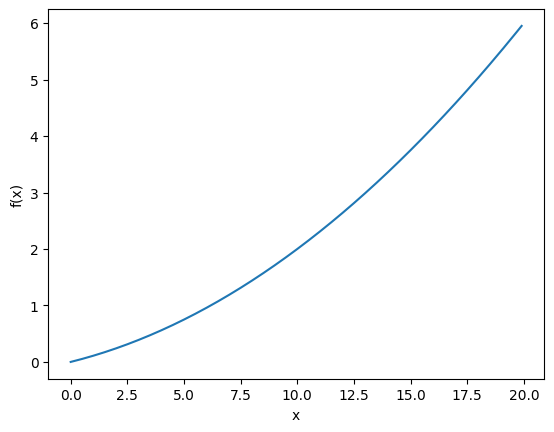

In [81]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = func1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [82]:
numerical_diff(func1, 5)

0.1999999999990898

In [83]:
numerical_diff(func1, 10)

0.2999999999986347

#### 편미분은 이렇게 한다!  
변수가 2개 이상인 함수에서 편미분을 구하는 코드

In [84]:
def func2(x):
    return x[0]**2 + x[1]**2

In [85]:
def func_tmp(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(func_tmp, 3.0)

6.00000000000378

In [90]:
def func_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(func_tmp2, 4.0)

7.999999999999119

In [92]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [95]:
numerical_gradient(func2, np.array([3.0, 4.0]))

numerical_gradient(func2, np.array([0.0, 2.0]))

numerical_gradient(func2, np.array([3.0, 0.0]))

array([6., 0.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


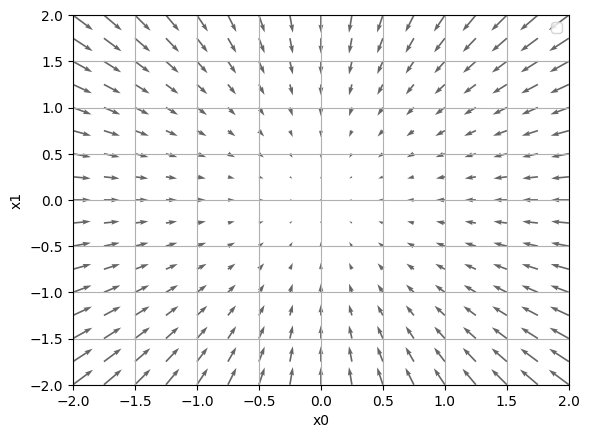

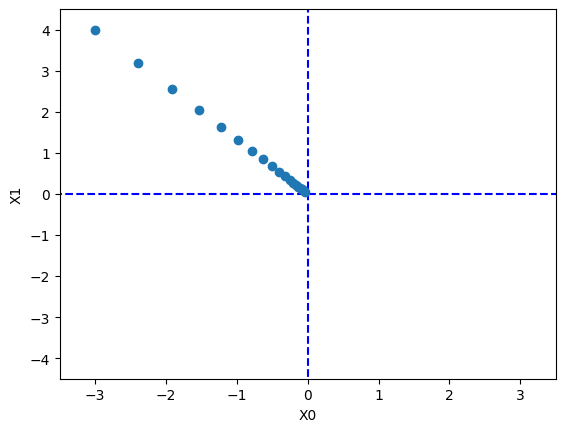

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [97]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [98]:
def func_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(func_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [105]:
import sys, os 
sys.path.append(os.path.join(os.path.dirname('./dataset/mnist.py'), '..'))
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, w):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [108]:
net = simpleNet()
print(net.W)

[[0.37069261 0.92709796 0.01828347]
 [0.63540826 1.15502963 0.08809848]]


In [110]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[0.794283   1.59578545 0.09025871]


In [112]:
np.argmax(p)

1

In [119]:
t = np.array([0, 0, 1])
net.loss(x, t)

2.0186817445440837

In [121]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.16113954  0.35916186 -0.5203014 ]
 [ 0.24170931  0.53874278 -0.78045209]]


In [126]:
import sys, os 
sys.path.append(os.path.join(os.path.dirname('./dataset/mnist.py'), '..'))
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads


In [132]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)

In [140]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.7775166666666666, 0.7838
train acc, test acc | 0.8774166666666666, 0.8803
train acc, test acc | 0.8987166666666667, 0.9014
train acc, test acc | 0.90765, 0.9091
train acc, test acc | 0.9139833333333334, 0.9147
train acc, test acc | 0.9201833333333334, 0.9195
train acc, test acc | 0.9237666666666666, 0.9253
train acc, test acc | 0.9282333333333334, 0.9303
train acc, test acc | 0.93115, 0.9337
train acc, test acc | 0.9349166666666666, 0.937
train acc, test acc | 0.9377666666666666, 0.9391
train acc, test acc | 0.9399166666666666, 0.9417
train acc, test acc | 0.94275, 0.9424
train acc, test acc | 0.9441833333333334, 0.9435
train acc, test acc | 0.9468, 0.946
train acc, test acc | 0.9486833333333333, 0.9469


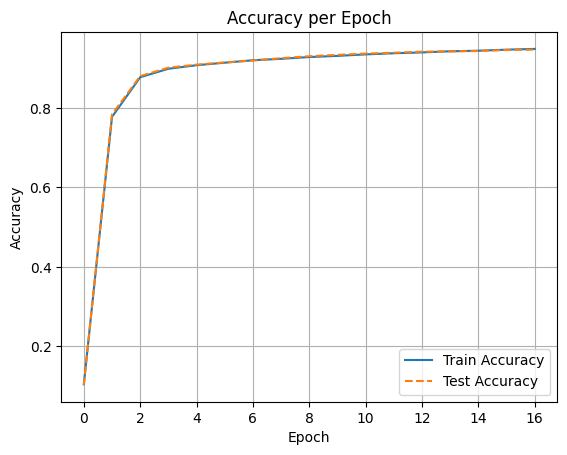

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# x축 값으로 epoch 생성
epochs = np.arange(len(train_acc_list))

# 그래프 그리기
plt.plot(epochs, train_acc_list, label='Train Accuracy')
plt.plot(epochs, test_acc_list, label='Test Accuracy', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid()
plt.show()